In [2]:
from dotenv import load_dotenv
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.graph.message import MessagesState
from langchain_groq import ChatGroq

In [3]:
load_dotenv()

True

In [29]:
model = ChatGroq(model = "llama-3.1-8b-instant")

In [5]:
model.invoke("who are you")

AIMessage(content="I'm an artificial intelligence model known as a Large Language Model (LLM). I'm a computer program designed to understand and generate human-like text. My primary function is to assist and communicate with users by providing information, answering questions, and engaging in conversations.\n\nI was trained on a massive dataset of text from various sources, including books, articles, and online content. This training allows me to recognize patterns, understand context, and generate responses that are often helpful and informative.\n\nSome of my capabilities include:\n\n1. Answering questions on a wide range of topics, from science and history to entertainment and culture.\n2. Generating text based on a prompt or topic.\n3. Translating text from one language to another.\n4. Summarizing long pieces of text into concise summaries.\n5. Offering suggestions and ideas on a particular subject.\n\nI'm constantly learning and improving through user interactions, so feel free to

In [30]:
def multiply(a:int,b:int) -> int:
    """
    Multiply the two number a and b
    
    args:
    a:int
    b:int
    """
    return a*b

def add(a:int,b:int) -> int:
    """
    Add the two number a and b
    
    args:
    a:int
    b:int
    """
    return a+b

def divide(a:int,b:int) -> int:
    """
    Divide the two number a and b
    
    args:
    a:int
    b:int
    """
    return int(a/b)

In [9]:
tools = [multiply,add,divide]
llm_with_tools = model.bind_tools(tools)

In [10]:
class MessagesState(MessagesState):
    pass

In [22]:
from langchain_core.messages import SystemMessage
def assistant(state:MessagesState):
    system_message = SystemMessage(content = "You are a helpful assistant that performs arithmatic operations")
    return {"messages":llm_with_tools.invoke([system_message] +  state['messages'])}

In [23]:
builder = StateGraph(MessagesState)

builder.add_node("assistant",assistant)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"assistant")
builder.add_conditional_edges("assistant",tools_condition)
builder.add_edge("tools","assistant")

graph = builder.compile()

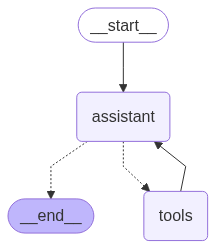

In [24]:
from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

In [25]:
messages = graph.invoke({"messages":"Add 6 and 4, divide by 2 and multiply by 3"})
messages

{'messages': [HumanMessage(content='Add 6 and 4, divide by 2 and multiply by 3', additional_kwargs={}, response_metadata={}, id='60cf828c-f7f9-4d7b-91fb-952cf8a2eb81'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'vd9z9wdp8', 'function': {'arguments': '{"a":6,"b":4}', 'name': 'add'}, 'type': 'function'}, {'id': '55j61gsg8', 'function': {'arguments': '{"a":10,"b":2}', 'name': 'divide'}, 'type': 'function'}, {'id': 'fgvgxcrq3', 'function': {'arguments': '{"a":5,"b":3}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 54, 'prompt_tokens': 817, 'total_tokens': 871, 'completion_time': 0.072, 'prompt_time': 0.052199331, 'queue_time': -0.117936481, 'total_time': 0.124199331}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8ab2e50475', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--791e50e4-c10e-406a-a504-d12a05a6fe7e-0', tool_calls=[{'name': 'add', 'args': {'a': 6, 'b': 4}, 'id': 'vd9z9wdp8',

In [27]:
from pydantic import BaseModel,Field
from typing import Annotated, List
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_core.messages.utils import AnyMessage

In [28]:
class State(BaseModel):
    messages : Annotated[List[AnyMessage],add_messages]

In [31]:
def multiply(a:int,b:int) -> int:
    """
    Multiply the two number a and b
    
    args:
    a:int
    b:int
    """
    return a*b

def add(a:int,b:int) -> int:
    """
    Add the two number a and b
    
    args:
    a:int
    b:int
    """
    return a+b

def divide(a:int,b:int) -> int:
    """
    Divide the two number a and b
    
    args:
    a:int
    b:int
    """
    return int(a/b)

In [32]:
tools = [multiply,divide,add]

In [33]:
llm_with_tools = model.bind_tools(tools)

In [34]:
llm_with_tools.invoke("hi")

AIMessage(content='What would you like to do?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 8, 'prompt_tokens': 383, 'total_tokens': 391, 'completion_time': 0.013086533, 'prompt_time': 0.022685281, 'queue_time': 0.049580413000000004, 'total_time': 0.035771814}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_510c177af0', 'finish_reason': 'stop', 'logprobs': None}, id='run--adf1f1bc-5752-443b-9ac6-8785b9ed54b3-0', usage_metadata={'input_tokens': 383, 'output_tokens': 8, 'total_tokens': 391})

In [ ]:
def llm_tool_func(state:State):
    return {"messages": llm_with_tools.invoke(state.messages)}

In [47]:
from langgraph.prebuilt import ToolNode, tools_condition

builder = StateGraph(State)
builder.add_node("assistant",llm_tool_func)
builder.add_node("tools",ToolNode(tools))

builder.add_edge(START,"assistant")
builder.add_conditional_edges("assistant",tools_condition)
builder.add_edge("tools","assistant")

graph = builder.compile()

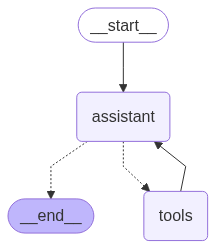

In [48]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [50]:
graph.invoke({"messages":"multiply 2 and 3 then add 6 to the result"})

{'messages': [HumanMessage(content='multiply 2 and 3 then add 6 to the result', additional_kwargs={}, response_metadata={}, id='c6409b53-a82d-4e37-8642-d070081aaf37'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'e75zp1er3', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}, {'id': 's8y55bf61', 'function': {'arguments': '{"a":6,"b":6}', 'name': 'add'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 36, 'prompt_tokens': 395, 'total_tokens': 431, 'completion_time': 0.068843352, 'prompt_time': 0.140811766, 'queue_time': 0.05240019399999998, 'total_time': 0.209655118}, 'model_name': 'llama-3.1-8b-instant', 'system_fingerprint': 'fp_8ab2e50475', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--f15a2456-be4b-4d4f-8ddd-6fa2bd6e9bba-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'e75zp1er3', 'type': 'tool_call'}, {'name': 'add', 'args': {'a': 6, 'b': 6}, 'id': 's8y55bf61', 'ty